# Ordinary Differential Equations

Chapter 8 of the texbook.

In this module we will develop numerical methods for solving ***the initial value problem (IVP) for ordinary differential equations (ODEs)***

$$
    \frac{d}{dt} {\bf y}(t) = {\bf f}({\bf y}(t), t), \qquad
    {\bf y}(t_0) = {\bf y}_0.
$$

### Example: A harmonic oscillator 
$$
    \frac{d^2}{dt^2} x(t) = -\omega^2 x(t), \qquad x(0)=1, \qquad \frac{d}{dt} x(0) = 0.
$$
The exact solution $x(t) = \cos(\omega t)$.

We can re-write the problem as
$$
    y_1 = x,
$$
$$
	\frac{d y_1}{dt} = y_2,
$$
$$
	\frac{d y_2}{dt} = \frac{d^2 x}{dt^2} = -\omega^2 x = -\omega^2 y_1.
$$

$$
    {\bf y}(t) = \left( y_1(t) \atop y_2(t) \right) = \left( x(t) \atop \quad \frac{dx(t)}{dt} \right) 
$$
$$
    \frac{d}{dt} { \bf y}(t) = \left( \frac{d y_1}{dt} \atop \frac{d y_2}{dt} \right) = \left( y_2 \atop -\omega^2 y_1 \right) 
$$

The initial condition
$$
    {\bf y}(0) = \left( x(0) \atop \quad \frac{dx(0)}{dt} \right) = \left(1 \atop 0\right).
$$

## Numerical methods for solving the IVP for ODEs:

* Explicit
* Implicit
* Predictor-corrector
* Geometric integrator
* Adaptive step size

## Explicit Euler's method

Using the forward finite difference (see Module 1), we obtain
$$
	\frac{d}{dt} {\bf y}(t) = {\bf f}({\bf y}(t), t)
	\Longrightarrow
	\frac{{\bf y}(t + \Delta t) - {\bf y}(t)}{\Delta t} + O(\Delta t)
	= {\bf f}({\bf y}(t), t)
$$
$$
	{\bf y}(t + \Delta t) = {\bf y}(t) + {\bf f}({\bf y}(t), t) \Delta t + O(\Delta t^2).
$$ 

We finally rewrite the formula as
$$
    {\bf y}_{k + 1} = {\bf y}_k + {\bf f}({\bf y}_k, t_k) \Delta t + O(\Delta t^2), \qquad
    k=1,2, \ldots,
$$
where the time lattice $t_k = (k -1) \Delta t$, ${\bf y}_k = {\bf y}(t_k)$. Note that ${\bf y}_1$ is the given initial condition.

In [1]:
function explicit_euler(𝐟::Function, 𝐲₀::Vector, T_final::Real, N::Int)
    
    # initialization
    𝐲 = zeros(length(𝐲₀), N + 1)
    
    # time range
    t = range(0, T_final, N + 1)
    Δt = t[2] - t[1]
    
    𝐲[:, 1] = 𝐲₀
    
    for k = 1:N
        𝐲[:, k + 1] = 𝐲[:, k] + 𝐟(𝐲[:, k], t[k]) * Δt
    end

    return t, 𝐲
end

explicit_euler (generic function with 1 method)

In [2]:
@time begin

expl_euler_t, expl_euler_𝐲 = explicit_euler(
    # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; -y[1]],
    
    # valu of 𝐲₀
    [1; 0],
    
    # value of T_final
    4 * π,
    
    # value of N
    100,
);
    
end;

  0.184877 seconds (1.10 M allocations: 55.472 MiB, 3.07% gc time, 97.78% compilation time)


sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


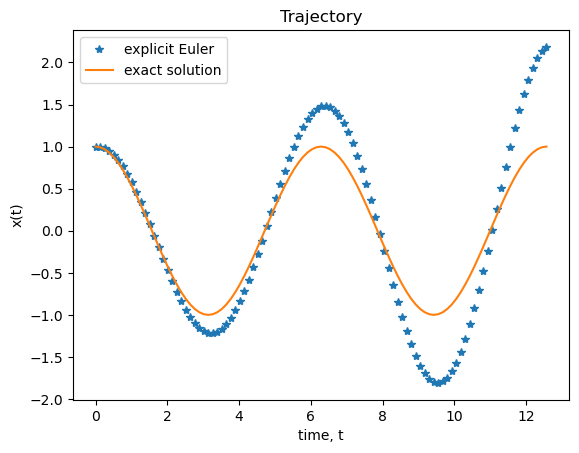

In [3]:
using PyPlot

title("Trajectory")
plot(expl_euler_t, expl_euler_𝐲[1, :], "*", label="explicit Euler")
plot(expl_euler_t, cos.(expl_euler_t), label="exact solution")
xlabel("time, t")
ylabel("x(t)")
legend()
show()

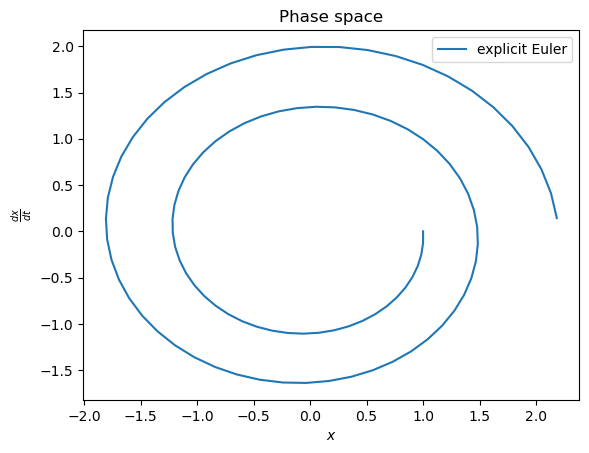

In [4]:
title("Phase space")
plot(expl_euler_𝐲[1, :], expl_euler_𝐲[2, :], label="explicit Euler")
xlabel(L"x")
ylabel(L"\frac{dx}{dt}")
legend()
show()

## Explicit Runge–Kutta methods

$$
    \frac{d}{dt} {\bf y}(t) = {\bf f}({\bf y}(t), t) 
    \Longrightarrow
$$
$$
     {\bf y}(t + \Delta t) - {\bf y}(t) = \int_{t}^{t + \Delta t} {\bf f}({\bf y}(\tau), \tau) d\tau.
$$
The mid-point integration rule
$$
    \int_{t}^{t + \Delta t} g(\tau) d\tau = g\left( t + \frac{\Delta t}{2} \right)\Delta t + O(\Delta t^3)
$$
we get
$$
    {\bf y}(t + \Delta t) = {\bf y}(t) +  {\bf f}\left({\bf y}\left(t + \frac{\Delta t}{2}\right), t + \frac{\Delta t}{2} \right)\Delta t + O(\Delta t^3).
$$
The value of the function ${\bf y}\left(t + \frac{\Delta t}{2}\right)$ at the midpoint can be obtained by the Euler method 
$$
    {\bf y}\left(t + \frac{\Delta t}{2}\right) = {\bf y}(t) + {\bf f}({\bf y}(t), t) \frac{\Delta t}{2} + O(\Delta t^2).
$$

### RK2 

Second-order methods with two stages
$$
    {\bf y}(t + \Delta t) = {\bf y}(t) +  {\bf f}\left(
        {\bf y}(t) + {\bf f}({\bf y}(t), t) \frac{\Delta t}{2} , t + \frac{\Delta t}{2} 
    \right)\Delta t
$$
or on the time grind
$$
    {\bf y}_{k + 1} = {\bf y}_k + {\bf f}\left(
        {\bf y}_k + {\bf f}({\bf y}_k, t_k) \frac{\Delta t}{2} , t_k + \frac{\Delta t}{2}
    \right)\Delta t
$$

In practice, [the forth-order Runge-Kutta method (RK4)](https://dlmf.nist.gov/3.7#v) is widely used (and abused).

In [5]:
function explicit_rk2(𝐟::Function, 𝐲₀::Vector, T_final::Real, N::Int)
    
    # initialization
    𝐲 = zeros(length(𝐲₀), N + 1)
    
    # time range
    t = range(0, T_final, N + 1)
    Δt = t[2] - t[1]
    
    𝐲[:, 1] = 𝐲₀
    
    for k = 1:N
        g = 𝐲[:, k] + 𝐟(𝐲[:, k], t[k]) * Δt / 2
        𝐲[:, k + 1] =  𝐲[:, k] + 𝐟(g, t[k] + Δt / 2 ) * Δt
    end

    return t, 𝐲
end

explicit_rk2 (generic function with 1 method)

In [6]:
@time begin

expl_rk2_t, expl_rk2_𝐲 = explicit_rk2(
    # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; -y[1]],
    
    # valu of 𝐲₀
    [1; 0],
    
    # value of T_final
    4 * π,
    
    # value of N
    100,
);
    
end;

  0.031233 seconds (232.19 k allocations: 11.776 MiB, 99.79% compilation time)


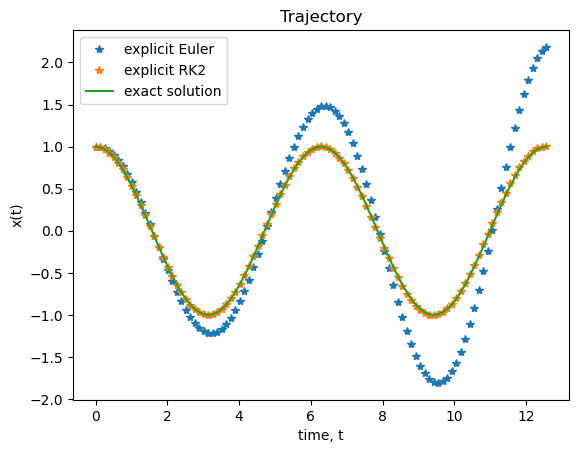

In [7]:
title("Trajectory")
plot(expl_euler_t, expl_euler_𝐲[1, :], "*", label="explicit Euler")
plot(expl_rk2_t, expl_rk2_𝐲[1, :], "*", label="explicit RK2")
plot(expl_euler_t, cos.(expl_euler_t), label="exact solution")
xlabel("time, t")
ylabel("x(t)")
legend()
show()

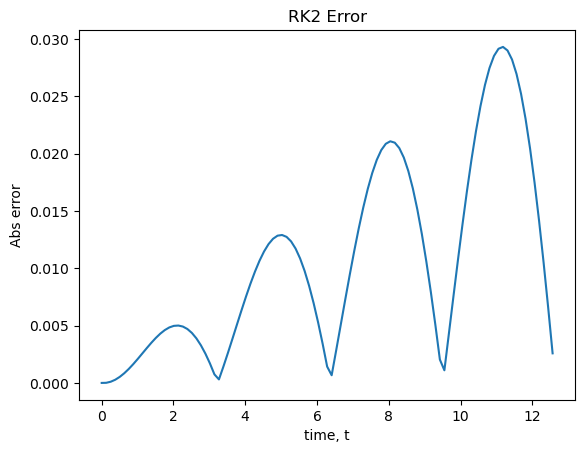

In [8]:
title("RK2 Error")

rk2_error = abs.(cos.(expl_rk2_t) - expl_rk2_𝐲[1, :])

plot(expl_rk2_t, rk2_error)
xlabel("time, t")
ylabel("Abs error")
show()

## Implicit Euler method

$$
    \frac{d}{dt} {\bf y}(t) = {\bf f}({\bf y}(t), t), 
$$
$$
     t \to t + \Delta t \Longrightarrow
     \frac{d}{dt} {\bf y}(t + \Delta t) = {\bf f}({\bf y}(t + \Delta t), t + \Delta t), 
$$

Using the backward finite difference, $ df(t) / dt = [f(t) - f(t - \Delta t)]/\Delta t + O(\Delta t)$, we get 

$$
    \frac{d}{dt} {\bf y}(t + \Delta t) = \frac{{\bf y}(t + \Delta t) - {\bf y}(t + \Delta t - \Delta t)}{\Delta t}
        + O(\Delta t)
$$

$$
    {\bf y}(t + \Delta t) - {\bf y}(t) = {\bf f}({\bf y}(t + \Delta t), t + \Delta t) \Delta t + O(\Delta t^2),
$$

or on the grid

$$
    {\bf y}_{k + 1} = {\bf y}_k + {\bf f}({\bf y}_{k+1}, t_{k+1}) \Delta t.
$$

Hence, for a given ${\bf y}_k$, we need to solve this equation with respect to unknown ${\bf y}_{k+1}$.

In [9]:
#=
    We will learn about this later.

    The function get_fix_point(f, x0) fix_point solves an equation x = f(x) for x.
    x0 is the initial guess
=#
function get_fix_point(f, x0)
    
    # let's do first several iterations
    sₙ = f(f(f(f(f(x0)))))
    sₙ₊₁ = f(sₙ)
    sₙ₊₂ = f(sₙ₊₁)
    
    # Use Aitken's delta-squared process to accelerate the convergence, http://dlmf.nist.gov/3.9.iii
    
    denominators = sₙ₊₂ - 2. * sₙ₊₁ + sₙ
    
    if any(denominators .≈ 0)
        return sₙ₊₂
    else
        return sₙ - (sₙ₊₁ - sₙ) .^ 2 ./ denominators
    end
end

get_fix_point (generic function with 1 method)

In [10]:
function implicit_euler(𝐟::Function, 𝐲₀::Vector, T_final::Real, N::Int)
    
    # initialization
    𝐲 = zeros(length(𝐲₀), N + 1)
    
    # time range
    t = range(0, T_final, N + 1)
    Δt = t[2] - t[1]
    
    𝐲[:, 1] = 𝐲₀
    
    for k = 1:N
        𝐲[:, k + 1] = get_fix_point(
            
            # the same as, x -> 𝐲[:, k] + 𝐟(x, t[k + 1]) * Δt
            𝐲ₖ₊₁ -> 𝐲[:, k] + 𝐟(𝐲ₖ₊₁, t[k + 1]) * Δt,
        
            𝐲[:, k]
        )
    end

    return t, 𝐲
end

implicit_euler (generic function with 1 method)

In [11]:
@time begin

impl_euler_t, impl_euler_𝐲 = implicit_euler(
    # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; -y[1]],
    
    # valu of 𝐲₀
    [1; 0],
    
    # value of T_final
    4 * π,
    
    # value of N
    100,
);
    
end;

  0.097436 seconds (1.12 M allocations: 53.430 MiB, 5.98% gc time, 99.86% compilation time)


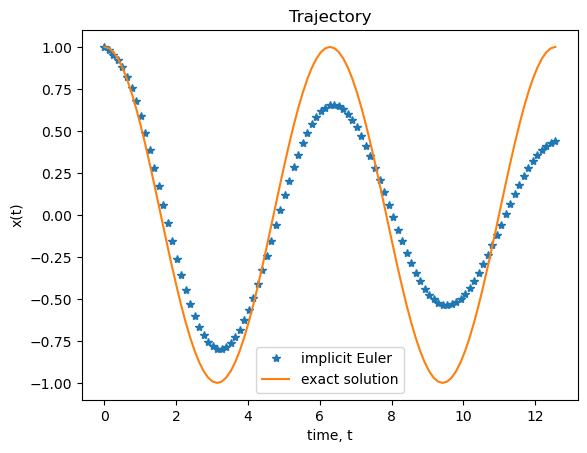

In [12]:
title("Trajectory")

plot(impl_euler_t, impl_euler_𝐲[1, :], "*", label="implicit Euler")
plot(impl_euler_t, cos.(impl_euler_t), label="exact solution")
xlabel("time, t")
ylabel("x(t)")
legend()
show()

## Implicit Runge–Kutta method (RK2)

$$
    \frac{d}{dt} {\bf y}(t) = {\bf f}({\bf y}(t), t) 
    \Longrightarrow \\
     {\bf y}(t + \Delta t) - {\bf y}(t) = \int_{t}^{t + \Delta t} {\bf f}({\bf y}(\tau), \tau) d\tau.
$$
Recall the trapezoid integration rule
$$
    \int_{t}^{t + \Delta t} g(\tau) d\tau = \frac{g\left(t + \Delta t \right)  + g(t)}{2} \Delta t + O(\Delta t^3)
$$
we get
$$
    {\bf y}(t + \Delta t) = {\bf y}(t) +  \frac{{\bf f}\left(
        {\bf y}\left(t + \Delta t\right), t +\Delta t
     \right) + {\bf f}({\bf y}(t), t)}{2} \Delta t
$$
Hence, we need to solve the equation for the unknown ${\bf y}_{k + 1}$
$$
    {\bf y}_{k + 1} = {\bf y}_k + \frac{{\bf f}({\bf y}_{k+1}, t_{k+1}) + {\bf f}({\bf y}_{k}, t_{k})}{2} \Delta t.
$$

In [13]:
function implicit_rk2(𝐟::Function, 𝐲₀::Vector, T_final::Real, N::Int)
    
    # initialization
    𝐲 = zeros(length(𝐲₀), N + 1)
    
    # time range
    t = range(0, T_final, N + 1)
    Δt = t[2] - t[1]
    
    𝐲[:, 1] = 𝐲₀
    
    for k = 1:N
        𝐲[:, k + 1] = get_fix_point(
            
            𝐲ₖ₊₁ -> 𝐲[:, k] + (𝐟(𝐲ₖ₊₁, t[k + 1]) + 𝐟(𝐲[:, k], t[k])) * Δt / 2,
        
            𝐲[:, k]
        )
    end

    return t, 𝐲
end

implicit_rk2 (generic function with 1 method)

In [14]:
@time begin

impl_rk2_t, impl_rk2_𝐲 = implicit_rk2(
    # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; -y[1]],
    
    # valu of 𝐲₀
    [1; 0],
    
    # value of T_final
    4 * π,
    
    # value of N
    100,
);
    
end;

  0.062049 seconds (437.81 k allocations: 20.235 MiB, 8.30% gc time, 99.55% compilation time)


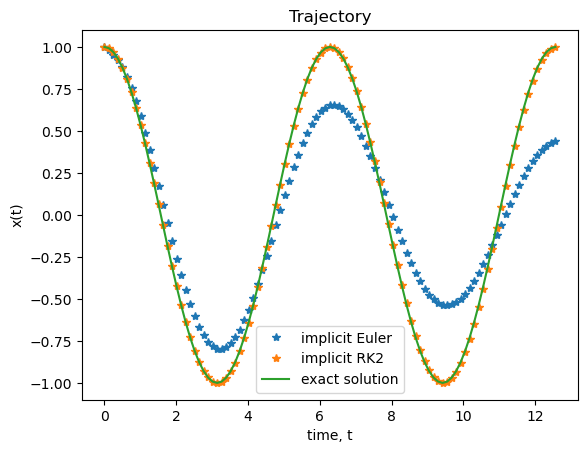

In [15]:
title("Trajectory")

plot(impl_euler_t, impl_euler_𝐲[1, :], "*", label="implicit Euler")
plot(impl_rk2_t, impl_rk2_𝐲[1, :], "*", label="implicit RK2")
plot(impl_euler_t, cos.(impl_euler_t), label="exact solution")
xlabel("time, t")
ylabel("x(t)")
legend()
show()

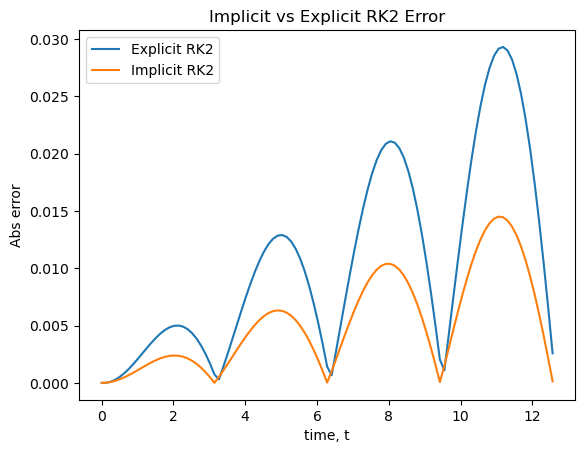

In [16]:
title("Implicit vs Explicit RK2 Error")

impl_rk2_error = abs.(cos.(impl_rk2_t) - impl_rk2_𝐲[1, :])

plot(expl_rk2_t, rk2_error, label="Explicit RK2")
plot(impl_rk2_t, impl_rk2_error, label="Implicit RK2")
xlabel("time, t")
ylabel("Abs error")
legend()
show()

## Predictor-corrector method

It combines the ides from both the implicit and explicit methods.

Let us discuss Heun's method:

The first step is to predict
$$
	\eta = {\bf y}_k + {\bf f}({\bf y}_k, t_k) \Delta t,
$$
which is the explicit Euler. Here, $\eta$ is an estimate for ${\bf y}_{k+1}$.

The second step is to correct (looks like the implicit RK2)

$$
	{\bf y}_{k+1} = {\bf y}_k + \frac{{\bf f}(\eta, t_k) + {\bf f}({\bf y}_k, t_k)}{2} \Delta t.
$$

*You will implement this in Homework 2.*

## What about energy?

The **total energy** of harmonic oscillator (i.e., Hamiltonian) 
$$
    E = \frac{1}{2} m \left( \frac{dx}{dt} \right)^2 + \frac{1}{2} m \omega^2 x^2 = \mbox{const}
$$
is observed (i.e., does not depend on time). In our notation,
$$
    E = \frac{1}{2} m y_2^2 + \frac{1}{2} m \omega^2 y_1^2.
$$

In [17]:
energy_impl = 0.5 * impl_rk2_𝐲[2, :] .^ 2 + 0.5 * impl_rk2_𝐲[1, :] .^ 2
energy_expl = 0.5 * expl_rk2_𝐲[2, :] .^ 2 + 0.5 * expl_rk2_𝐲[1, :] .^ 2;

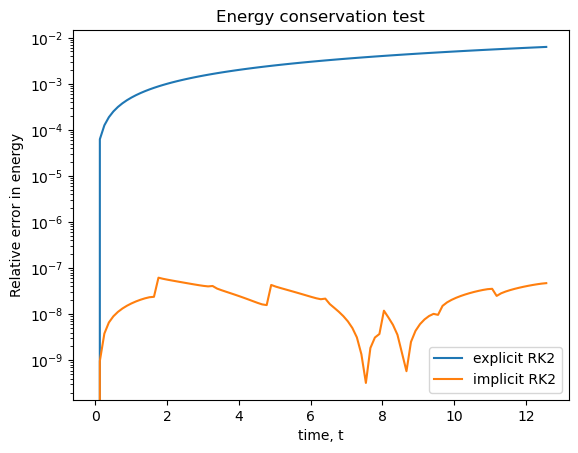

In [18]:
title("Energy conservation test")

semilogy(expl_rk2_t, abs.(energy_expl .- 0.5) ./ 0.5, label="explicit RK2")
semilogy(impl_rk2_t, abs.(energy_impl .- 0.5) ./ 0.5, label="implicit RK2")
xlabel("time, t")
ylabel("Relative error in energy")
legend()
show()

## Poor energy conservation can lead to 💩 and 😱: Example

Consider the system 
$$
   \frac{d^2}{dt^2} x = -U'(x) = 2x \exp(-x^2)
$$
$$
   \Longrightarrow \frac{d}{dt} {\bf y} = \left( y_2 \atop 2y_1 \exp(-y_1^2) \right)
$$
whith the potential energy $U(x) = \exp(-x^2)$.

The total energy is conserved
$$
    E = \frac{1}{2} \left(\frac{dx}{dt}\right)^2 + U(x) = \mbox{const}.
$$

Hence, if a particle starts very far from the origin (e.g., $x=-5$) with the velocity $< \sqrt{2}$ it must *never* cross the origin.  

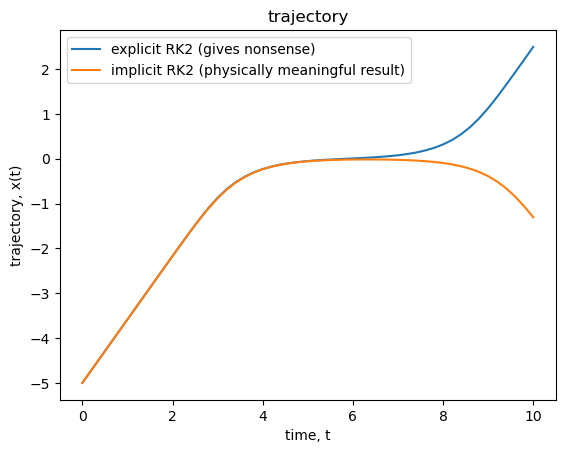

In [19]:
example_ex_rk2_t, example_ex_rk2_𝐲 = explicit_rk2(
     # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; 2 * y[1] * exp(-y[1] ^ 2)],

    # the initial condition
    [-5; 1.414],

    # T_final
    10,

    # N
    50
)

example_im_rk2_t, example_im_rk2_𝐲 = implicit_rk2(
     # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; 2 * y[1] * exp(-y[1] ^ 2)],

    # the initial condition
    [-5; 1.414],

    # T_final
    10,

    # N
    50
)

title("trajectory")
plot(example_ex_rk2_t, example_ex_rk2_𝐲[1,:], label="explicit RK2 (gives nonsense)")
plot(example_im_rk2_t, example_im_rk2_𝐲[1,:], label="implicit RK2 (physically meaningful result)")
xlabel("time, t")
ylabel("trajectory, x(t)")
legend()
show()

## Geometric integrators

See [Sergio Blanes ``A concise introduction to geometric numerical integration'' (Taylor & Francis, 2016)](https://library.search.tulane.edu/permalink/01TUL_INST/1vh4m5n/alma9936698843806326) for an overview.


Assume we want to solve the Newton's equation 
$$
    \frac{d^2}{dt^2} {\bf r} = {\bf F}({\bf r}),
$$
note that ${\bf F}$ is the time independent force divided by mass. 

The [Omelyan integrator](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.65.056706), 
which is the optimized [position Verlet integrator](https://en.wikipedia.org/wiki/Verlet_integration).

The propagation $({\bf r}_k, {\bf v}_k) \to ({\bf r}_{k + 1}, {\bf v}_{k + 1})$ is performed as follows:
$$
    {\bf v}_{I} = {\bf v}_k +  {\bf F}({\bf r}_k) \xi \Delta t, 
$$
$$
    {\bf r}_{I} = {\bf r}_k + {\bf v}_{I} \frac{\Delta t}{2}, 
$$
$$
    {\bf v}_{II} = {\bf v}_{I} +  {\bf F}({\bf r}_{I}) (1-2\xi) \Delta t, 
$$
$$
    {\bf r}_{k + 1} = {\bf r}_{I} + {\bf v}_{II} \frac{\Delta t}{2},
$$
$$
    {\bf v}_{k + 1} = {\bf v}_{II} +  {\bf F}({\bf r}_{k + 1}) \xi \Delta t,
$$

where $\xi$ is the constant
$$
    \xi = \frac{1}{2} - \frac{(2\sqrt{326} + 36)^{1/3}}{12} + \frac{1}{6(2\sqrt{326} + 36) ^ {1/3}}.
$$


In [20]:
function omelyan(𝐅::Function, 𝐫₀::Vector, 𝐯₀::Vector, T_final::Real, N::Int)
    
    # initialization
    𝐫 = zeros(length(𝐫₀), N + 1)
    𝐯 = zeros(length(𝐯₀), N + 1)
    
    # time range
    t = range(0, T_final, N + 1)
    Δt = t[2] - t[1]
    
    𝐫[:, 1] = 𝐫₀
    𝐯[:, 1] = 𝐯₀
    
    ξ = 0.5 - (2 * sqrt(326) + 36) ^ (1/3) / 12 + 1 / (6 * (2 * sqrt(326) + 36) ^ (1/3))
    
    for k = 1:N
        𝐯I = 𝐯[:, k] + 𝐅(𝐫[:, k]) * ξ * Δt 
        𝐫I = 𝐫[:, k] + 𝐯I * Δt / 2
        𝐯II = 𝐯I + 𝐅(𝐫I) * (1 - 2 * ξ) * Δt
        𝐫[:, k + 1] = 𝐫I + 𝐯II * Δt / 2
        𝐯[:, k + 1] = 𝐯II + 𝐅(𝐫[:, k + 1]) * ξ * Δt 
    end

    return t, 𝐫, 𝐯
end

omelyan (generic function with 1 method)

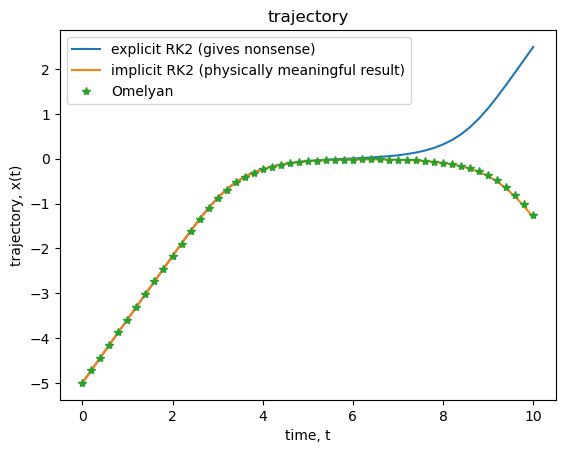

In [21]:
omelyan_t, x, v = omelyan(
    x -> 2. * x .* exp.(-x .^ 2),
    [-5],
    [1.414],
    10,
    50
);

title("trajectory")
plot(example_ex_rk2_t, example_ex_rk2_𝐲[1,:], label="explicit RK2 (gives nonsense)")
plot(example_im_rk2_t, example_im_rk2_𝐲[1,:], label="implicit RK2 (physically meaningful result)")
plot(omelyan_t, x[:], "*", label="Omelyan")
xlabel("time, t")
ylabel("trajectory, x(t)")
legend()
show()


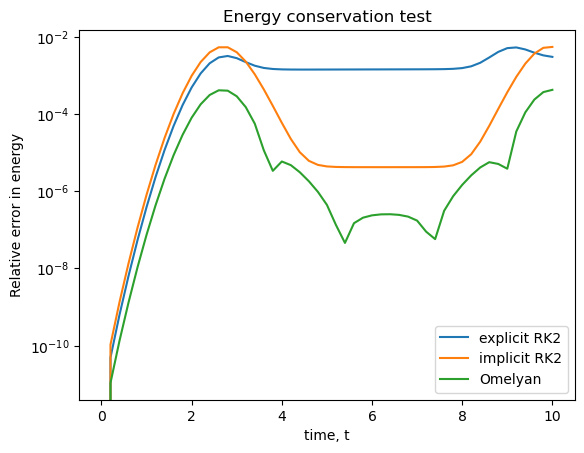

In [22]:
energy_example_ex_rk2 = 0.5 * example_ex_rk2_𝐲[2, :] .^ 2 + exp.(-example_ex_rk2_𝐲[1, :] .^ 2)
energy_example_im_rk2 = 0.5 * example_im_rk2_𝐲[2, :] .^ 2 + exp.(-example_im_rk2_𝐲[1, :] .^ 2)
energy_omelyan = 0.5 * v[:] .^ 2 + exp.(-x[:] .^ 2)

title("Energy conservation test")

semilogy(
    example_ex_rk2_t, 
    abs.(energy_example_ex_rk2 .- energy_example_ex_rk2[1]) ./ energy_example_ex_rk2[1], 
    label="explicit RK2"
)
semilogy(
    example_im_rk2_t, 
    abs.(energy_example_im_rk2 .- energy_example_im_rk2[1]) ./ energy_example_im_rk2[1], 
    label="implicit RK2"
)
semilogy(
    omelyan_t,
    abs.(energy_omelyan .- energy_omelyan[1]) ./ energy_omelyan[1],
    label="Omelyan"
)

xlabel("time, t")
ylabel("Relative error in energy")
legend()
show()

## How to justify that you get good results (convergence)

*Converegence*: Numerical results should not depend on $N$ (or $\Delta t$)

In [23]:
explicit_rk2(
     # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; 2 * y[1] * exp(-y[1] ^ 2)],

    # the initial condition
    [-5; 1.414],

    # T_final
    10,

    # N
    50
)[2][1, end]

2.4912100148795617

In [24]:
explicit_rk2(
     # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; 2 * y[1] * exp(-y[1] ^ 2)],

    # the initial condition
    [-5; 1.414],

    # T_final
    10,

    # N
    100
)[2][1, end]

-0.5831943026038299

In [25]:
explicit_rk2(
     # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; 2 * y[1] * exp(-y[1] ^ 2)],

    # the initial condition
    [-5; 1.414],

    # T_final
    10,

    # N
    400
)[2][1, end]

-1.2541638770730583

In [26]:
explicit_rk2(
     # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; 2 * y[1] * exp(-y[1] ^ 2)],

    # the initial condition
    [-5; 1.414],

    # T_final
    10,

    # N
    1000
)[2][1, end]

-1.2630836194533672

In [27]:
explicit_rk2(
     # function 𝐟 decleared as an in-line function
    (y, t) -> [y[2]; 2 * y[1] * exp(-y[1] ^ 2)],

    # the initial condition
    [-5; 1.414],

    # T_final
    10,

    # N
    2000
)[2][1, end]

-1.2637065531933056

## Adaptive step size method

In [28]:
using LinearAlgebra

function adaptive_explicit_rk2(𝐟::Function, 𝐲₀::Vector, T_final::Real, Δt₀::Real, ε::Real)
    
    function single_step_propagation(𝐲ₖ)
        # make a single step propagation via RK2
        # (change it the method you want)
        
        g = 𝐲ₖ + 𝐟(𝐲ₖ, t) * Δtₖ / 2
        return 𝐲ₖ + 𝐟(g, t + Δtₖ / 2 ) * Δtₖ
    end
    
    function rel_error(𝐲ₖ, 𝐲ₖ₊₁)
        # we will use the relative error to characterize the change 
        # (should be adapted to the application)
        norm(𝐲ₖ₊₁ - 𝐲ₖ) / norm(𝐲ₖ₊₁)
    end
    
    Δtₖ₋₁ = Δtₖ = Δt₀
    
    # current time
    t = 0.
    
    # variables to save errors
    eₙ₋₂ = eₙ₋₁ = eₙ = eₙ₊₁ = 0.
    
    # List (i.e., variable size of arrays) to store solutions at different times
    𝐲 = [𝐲₀]
    times = [t]
    
    # repeat untill the final time is reached
    while t < T_final
        
        𝐲ₖ = 𝐲[end]
        
        # make a single step
        𝐲ₖ₊₁ = single_step_propagation(𝐲ₖ)
        
        # get the error
        eₙ = rel_error(𝐲ₖ, 𝐲ₖ₊₁)
        
        while eₙ > ε
            # the error is too high, decrease the time step and propagate with the new time step 
            Δtₖ *= ε / eₙ
            𝐲ₖ₊₁ = single_step_propagation(𝐲ₖ)
            eₙ = rel_error(𝐲ₖ, 𝐲ₖ₊₁)
        end
        
        # Since the error is below the threshold, save the current solution 
        # (If each solution is large, you should not save it for every time)
        push!(𝐲, 𝐲ₖ₊₁)
        
        # increment time
        t += Δtₖ
        
        # save the current time
        push!(times, t)
        
        ############################################################################################################
        #
        #   Update time step via the Evolutionary PID controller
        #
        ############################################################################################################        
        
        # overwrite the zero values
        if eₙ₋₁ == 0
            eₙ₋₁ = eₙ
        end

        if eₙ₋₂ == 0
            eₙ₋₂ = eₙ
        end
        
        # the adaptive time stepping method from
        #   https://linkinghub.elsevier.com/retrieve/pii/S0377042705001123
        # previous_Δt = Δtₖ
        
        # Δtₖ *= (ε ^ 2 / eₙ / eₙ₋₁ * Δtₖ₋₁ / Δtₖ) ^ (1 / 12)
        
        # Δtₖ₋₁ = previous_Δt
        
        # the adaptive time stepping method from
        #   http://www.mathematik.tu-dortmund.de/~kuzmin/cfdintro/lecture8.pdf
        
        Δtₖ *= (eₙ₋₁ / eₙ) ^ 0.075 * (ε / eₙ) ^ 0.175 * (eₙ₋₁ ^ 2 / eₙ / eₙ₋₂) ^ 0.01
        
        # update the error estimates in order to go next to the next step
        eₙ₋₂ = eₙ₋₁
        eₙ₋₁ = eₙ
    end
    
    return times, hcat(𝐲...)
end



adaptive_explicit_rk2 (generic function with 1 method)

In [29]:
example_adaptive_ex_rk2_t, example_adaptive_ex_rk2_𝐲 = adaptive_explicit_rk2(
    (y, t) -> [y[2]; 2 * y[1] * exp(-y[1] ^ 2)],
    [-5.; 1.414],
    10.,
    0.01,
    1e-2
)

([0.0, 0.01, 0.02255207647722962, 0.03739066192669989, 0.054539930894309085, 0.0738733412318001, 0.09523667325337581, 0.11844377276677562, 0.1432941430646693, 0.16958322861519268  …  9.90344583926362, 9.914987700528872, 9.926623714135994, 9.93835518427536, 9.95018337545782, 9.962109508919687, 9.974134759173438, 9.986260250755622, 9.998487055225855, 10.01081618847242], [-5.0 -4.985860000000007 … -1.2218679886083625 -1.2372594840793054; 1.414 1.4139999999985116 … -1.2449991230255615 -1.2516848769446294])

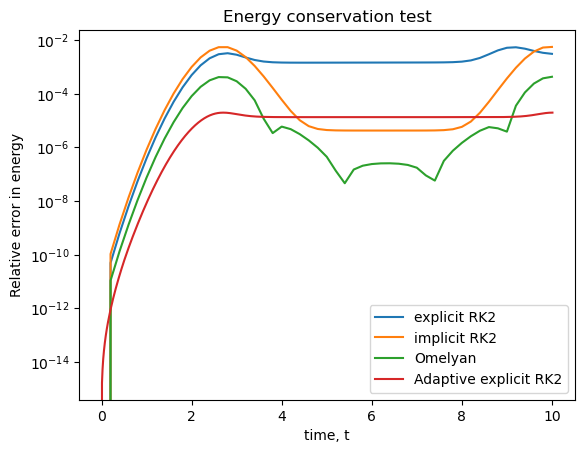

In [30]:
title("Energy conservation test")

energy_example_adaptive_ex_rk2 = 0.5 * example_adaptive_ex_rk2_𝐲[2, :] .^ 2  + exp.(-example_adaptive_ex_rk2_𝐲[1, :] .^ 2)


semilogy(
    example_ex_rk2_t, 
    abs.(energy_example_ex_rk2 .- energy_example_ex_rk2[1]) ./ energy_example_ex_rk2[1], 
    label="explicit RK2"
)
semilogy(
    example_im_rk2_t, 
    abs.(energy_example_im_rk2 .- energy_example_im_rk2[1]) ./ energy_example_im_rk2[1], 
    label="implicit RK2"
)
semilogy(
    omelyan_t,
    abs.(energy_omelyan .- energy_omelyan[1]) ./ energy_omelyan[1],
    label="Omelyan"
)
semilogy(
    example_adaptive_ex_rk2_t,
    abs.(energy_example_adaptive_ex_rk2 .- energy_example_adaptive_ex_rk2[1]) ./ energy_example_adaptive_ex_rk2[1],
    label="Adaptive explicit RK2"
)

xlabel("time, t")
ylabel("Relative error in energy")
legend()
show()

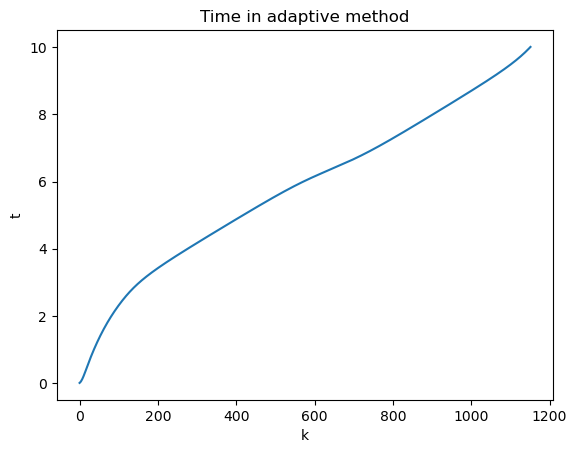

In [31]:
title("Time in adaptive method")
plot(example_adaptive_ex_rk2_t)
xlabel("k")
ylabel("t")
show()

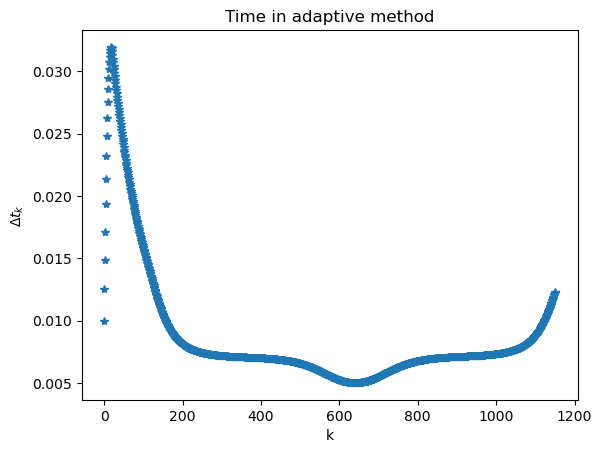

In [32]:
title("Time in adaptive method")
plot(diff(example_adaptive_ex_rk2_t), "*")
xlabel("k")
ylabel(L"\Delta t_k")
show()

## Recommended external libraries: [DynamicalSytems.jl](https://juliadynamics.github.io/DynamicalSystems.jl/latest/) and [DifferentialEquations.jl](https://docs.sciml.ai/DiffEqDocs/stable/)